# **Import Data and Basic Libraries**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
SEED=34 #for using random_state value all over the notebook

In [2]:
df=pd.read_csv('/kaggle/input/playground-series-s3e24/train.csv')
df.head()

,id,age,height(cm),weight(kg),waist(cm),eyesight(left),eyesight(right),hearing(left),hearing(right),systolic,...,HDL,LDL,hemoglobin,Urine protein,serum creatinine,AST,ALT,Gtp,dental caries,smoking
0,0,55,165,60,81.0,0.5,0.6,1,1,135,...,40,75,16.5,1,1.0,22,25,27,0,1
1,1,70,165,65,89.0,0.6,0.7,2,2,146,...,57,126,16.2,1,1.1,27,23,37,1,0
2,2,20,170,75,81.0,0.4,0.5,1,1,118,...,45,93,17.4,1,0.8,27,31,53,0,1
3,3,35,180,95,105.0,1.5,1.2,1,1,131,...,38,102,15.9,1,1.0,20,27,30,1,0
4,4,30,165,60,80.5,1.5,1.0,1,1,121,...,44,93,15.4,1,0.8,19,13,17,0,1


In [3]:
#Original Data set
org_df=pd.read_csv('/kaggle/input/smoker-status-prediction-using-biosignals/train_dataset.csv')
org_df.head()

,age,height(cm),weight(kg),waist(cm),eyesight(left),eyesight(right),hearing(left),hearing(right),systolic,relaxation,...,HDL,LDL,hemoglobin,Urine protein,serum creatinine,AST,ALT,Gtp,dental caries,smoking
0,35,170,85,97.0,0.9,0.9,1,1,118,78,...,70,142,19.8,1,1.0,61,115,125,1,1
1,20,175,110,110.0,0.7,0.9,1,1,119,79,...,71,114,15.9,1,1.1,19,25,30,1,0
2,45,155,65,86.0,0.9,0.9,1,1,110,80,...,57,112,13.7,3,0.6,1090,1400,276,0,0
3,45,165,80,94.0,0.8,0.7,1,1,158,88,...,46,91,16.9,1,0.9,32,36,36,0,0
4,20,165,60,81.0,1.5,0.1,1,1,109,64,...,47,92,14.9,1,1.2,26,28,15,0,0


# **Some Basic EDA**

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159256 entries, 0 to 159255
Data columns (total 24 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   id                   159256 non-null  int64  
 1   age                  159256 non-null  int64  
 2   height(cm)           159256 non-null  int64  
 3   weight(kg)           159256 non-null  int64  
 4   waist(cm)            159256 non-null  float64
 5   eyesight(left)       159256 non-null  float64
 6   eyesight(right)      159256 non-null  float64
 7   hearing(left)        159256 non-null  int64  
 8   hearing(right)       159256 non-null  int64  
 9   systolic             159256 non-null  int64  
 10  relaxation           159256 non-null  int64  
 11  fasting blood sugar  159256 non-null  int64  
 12  Cholesterol          159256 non-null  int64  
 13  triglyceride         159256 non-null  int64  
 14  HDL                  159256 non-null  int64  
 15  LDL              

In [5]:
org_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38984 entries, 0 to 38983
Data columns (total 23 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   age                  38984 non-null  int64  
 1   height(cm)           38984 non-null  int64  
 2   weight(kg)           38984 non-null  int64  
 3   waist(cm)            38984 non-null  float64
 4   eyesight(left)       38984 non-null  float64
 5   eyesight(right)      38984 non-null  float64
 6   hearing(left)        38984 non-null  int64  
 7   hearing(right)       38984 non-null  int64  
 8   systolic             38984 non-null  int64  
 9   relaxation           38984 non-null  int64  
 10  fasting blood sugar  38984 non-null  int64  
 11  Cholesterol          38984 non-null  int64  
 12  triglyceride         38984 non-null  int64  
 13  HDL                  38984 non-null  int64  
 14  LDL                  38984 non-null  int64  
 15  hemoglobin           38984 non-null 

There is no missing values

In [6]:
train_df=pd.concat([df,org_df])
train_df.drop_duplicates(inplace=True,ignore_index=True)
train_df.head()

,id,age,height(cm),weight(kg),waist(cm),eyesight(left),eyesight(right),hearing(left),hearing(right),systolic,...,HDL,LDL,hemoglobin,Urine protein,serum creatinine,AST,ALT,Gtp,dental caries,smoking
0,0.0,55,165,60,81.0,0.5,0.6,1,1,135,...,40,75,16.5,1,1.0,22,25,27,0,1
1,1.0,70,165,65,89.0,0.6,0.7,2,2,146,...,57,126,16.2,1,1.1,27,23,37,1,0
2,2.0,20,170,75,81.0,0.4,0.5,1,1,118,...,45,93,17.4,1,0.8,27,31,53,0,1
3,3.0,35,180,95,105.0,1.5,1.2,1,1,131,...,38,102,15.9,1,1.0,20,27,30,1,0
4,4.0,30,165,60,80.5,1.5,1.0,1,1,121,...,44,93,15.4,1,0.8,19,13,17,0,1


In [7]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 192723 entries, 0 to 192722
Data columns (total 24 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   id                   159256 non-null  float64
 1   age                  192723 non-null  int64  
 2   height(cm)           192723 non-null  int64  
 3   weight(kg)           192723 non-null  int64  
 4   waist(cm)            192723 non-null  float64
 5   eyesight(left)       192723 non-null  float64
 6   eyesight(right)      192723 non-null  float64
 7   hearing(left)        192723 non-null  int64  
 8   hearing(right)       192723 non-null  int64  
 9   systolic             192723 non-null  int64  
 10  relaxation           192723 non-null  int64  
 11  fasting blood sugar  192723 non-null  int64  
 12  Cholesterol          192723 non-null  int64  
 13  triglyceride         192723 non-null  int64  
 14  HDL                  192723 non-null  int64  
 15  LDL              

In [8]:
train_df=train_df.drop(['id'], axis=1)

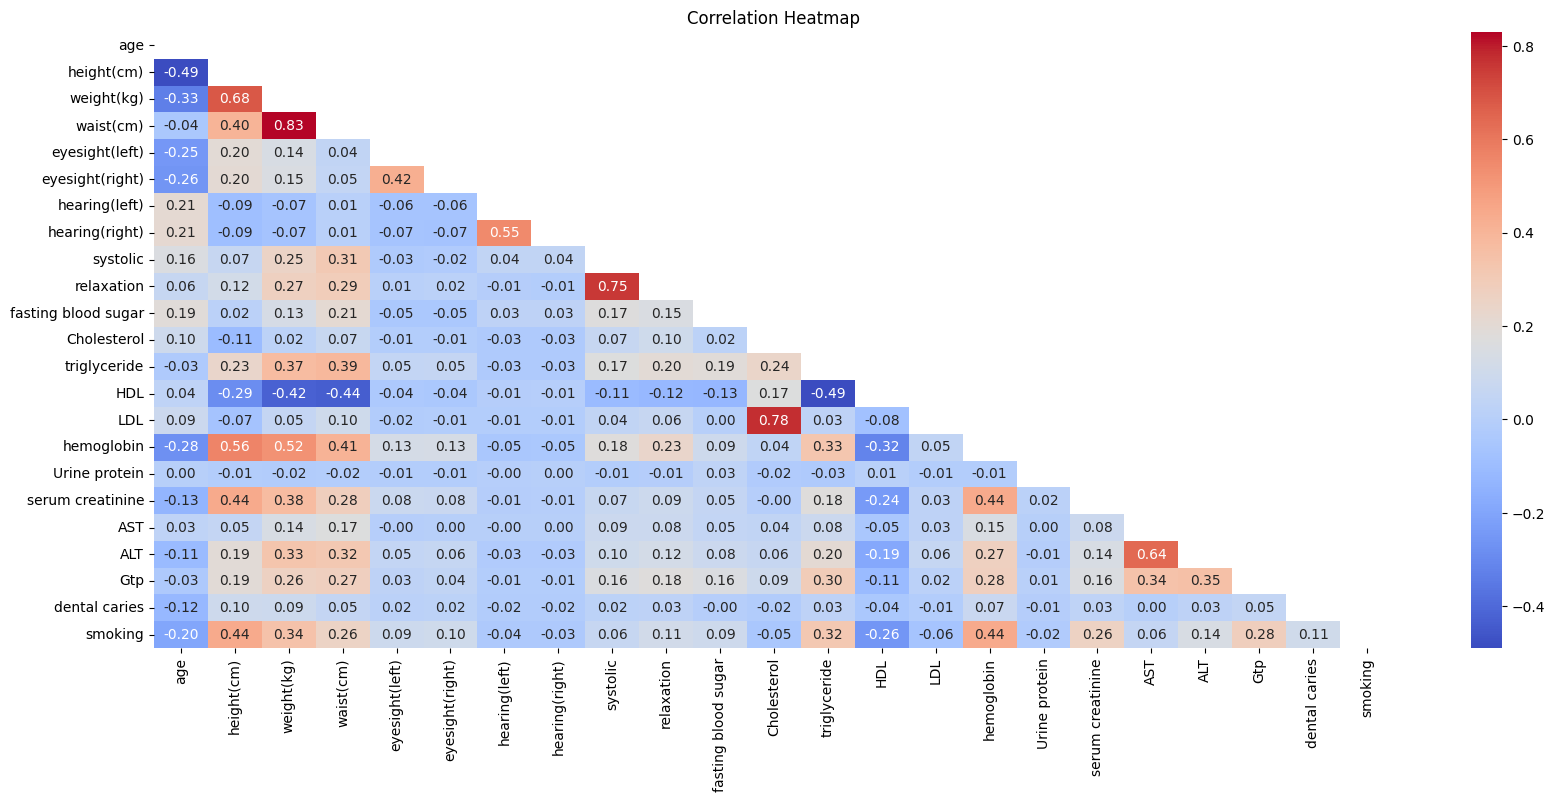

In [9]:
mask = np.triu(np.ones_like(train_df.corr(), dtype=bool))

plt.figure(figsize=(20, 8))  
sns.heatmap(train_df.corr(), annot=True, cmap="coolwarm", fmt=".2f",mask=mask)


plt.title("Correlation Heatmap")
plt.show()


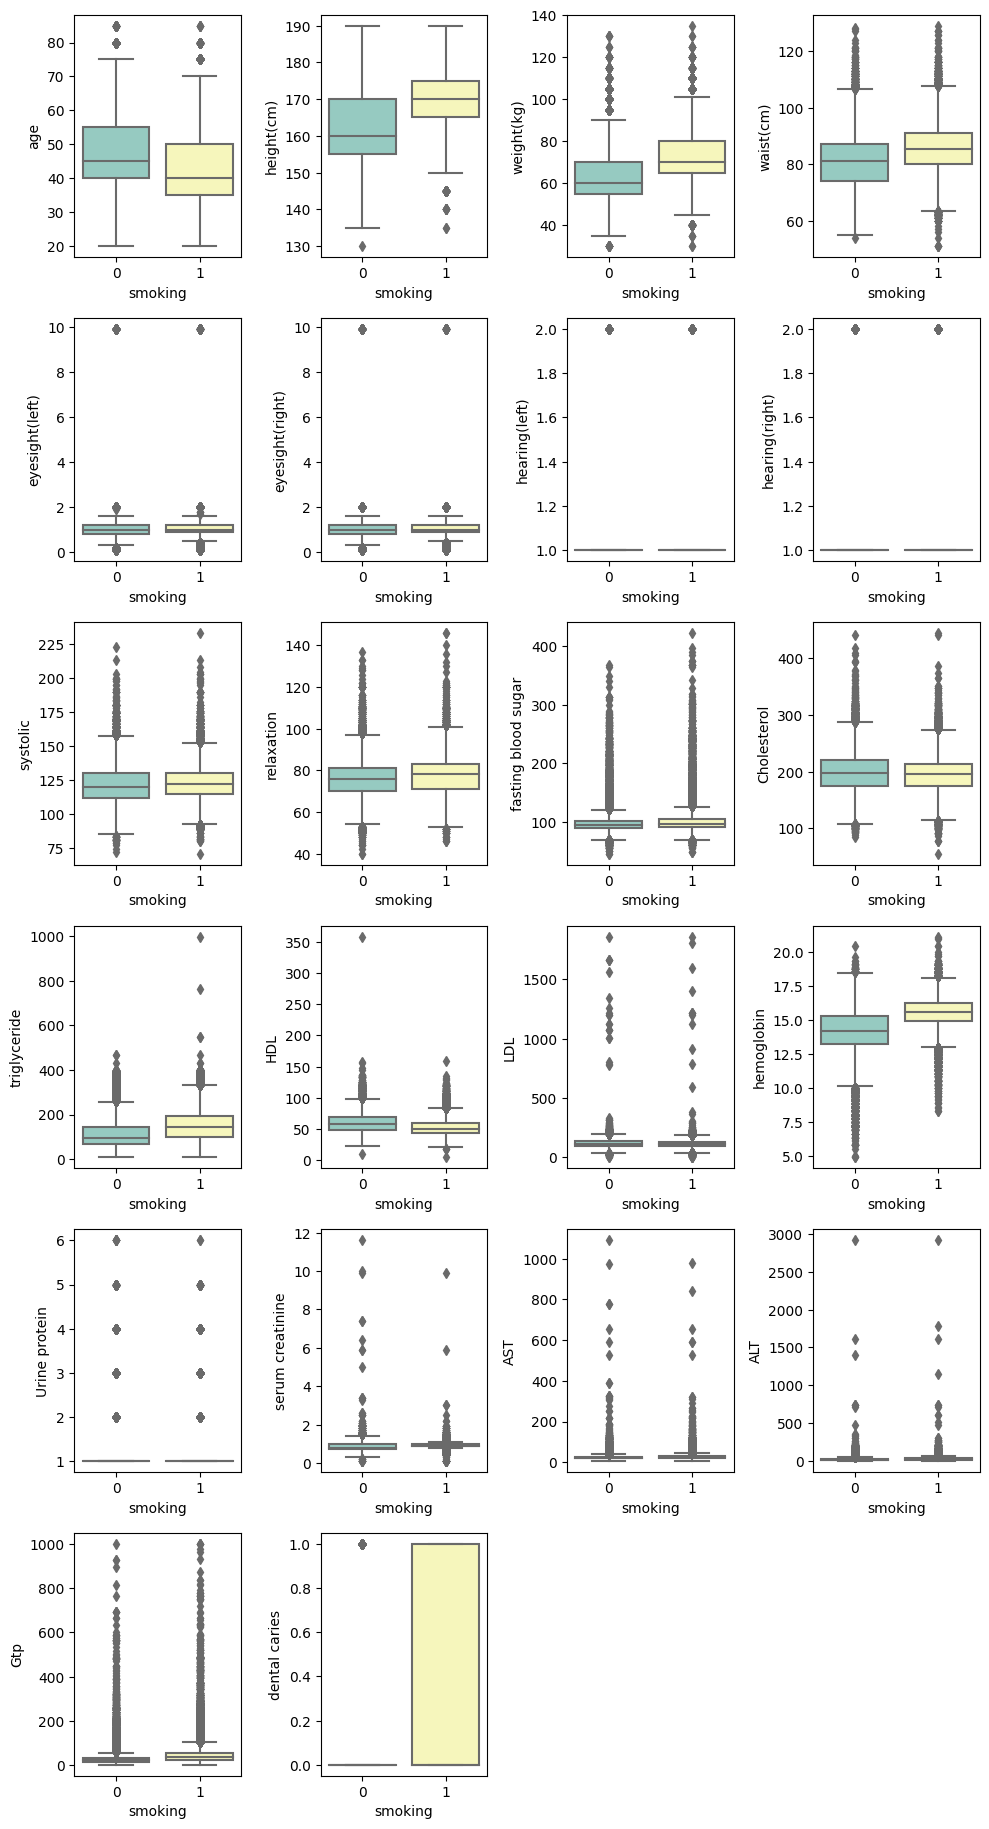

In [10]:

features = [col for col in train_df.columns if col != 'smoking']

n_rows = len(features)// 4 + len(features) % 4
n_cols = 4 
fig, axes = plt.subplots(nrows=n_rows, ncols=n_cols, figsize=(10, 3 * n_rows))

for i, feature in enumerate(features):
    ax = axes[i // n_cols, i % n_cols] 
    sns.boxplot(x='smoking', y=feature, data=train_df, palette='Set3', ax=ax)
    ax.set_ylabel(feature)
    ax.set_xlabel('smoking')

for i in range(len(features), n_rows * n_cols):
    fig.delaxes(axes.flatten()[i])
plt.tight_layout()
plt.show()


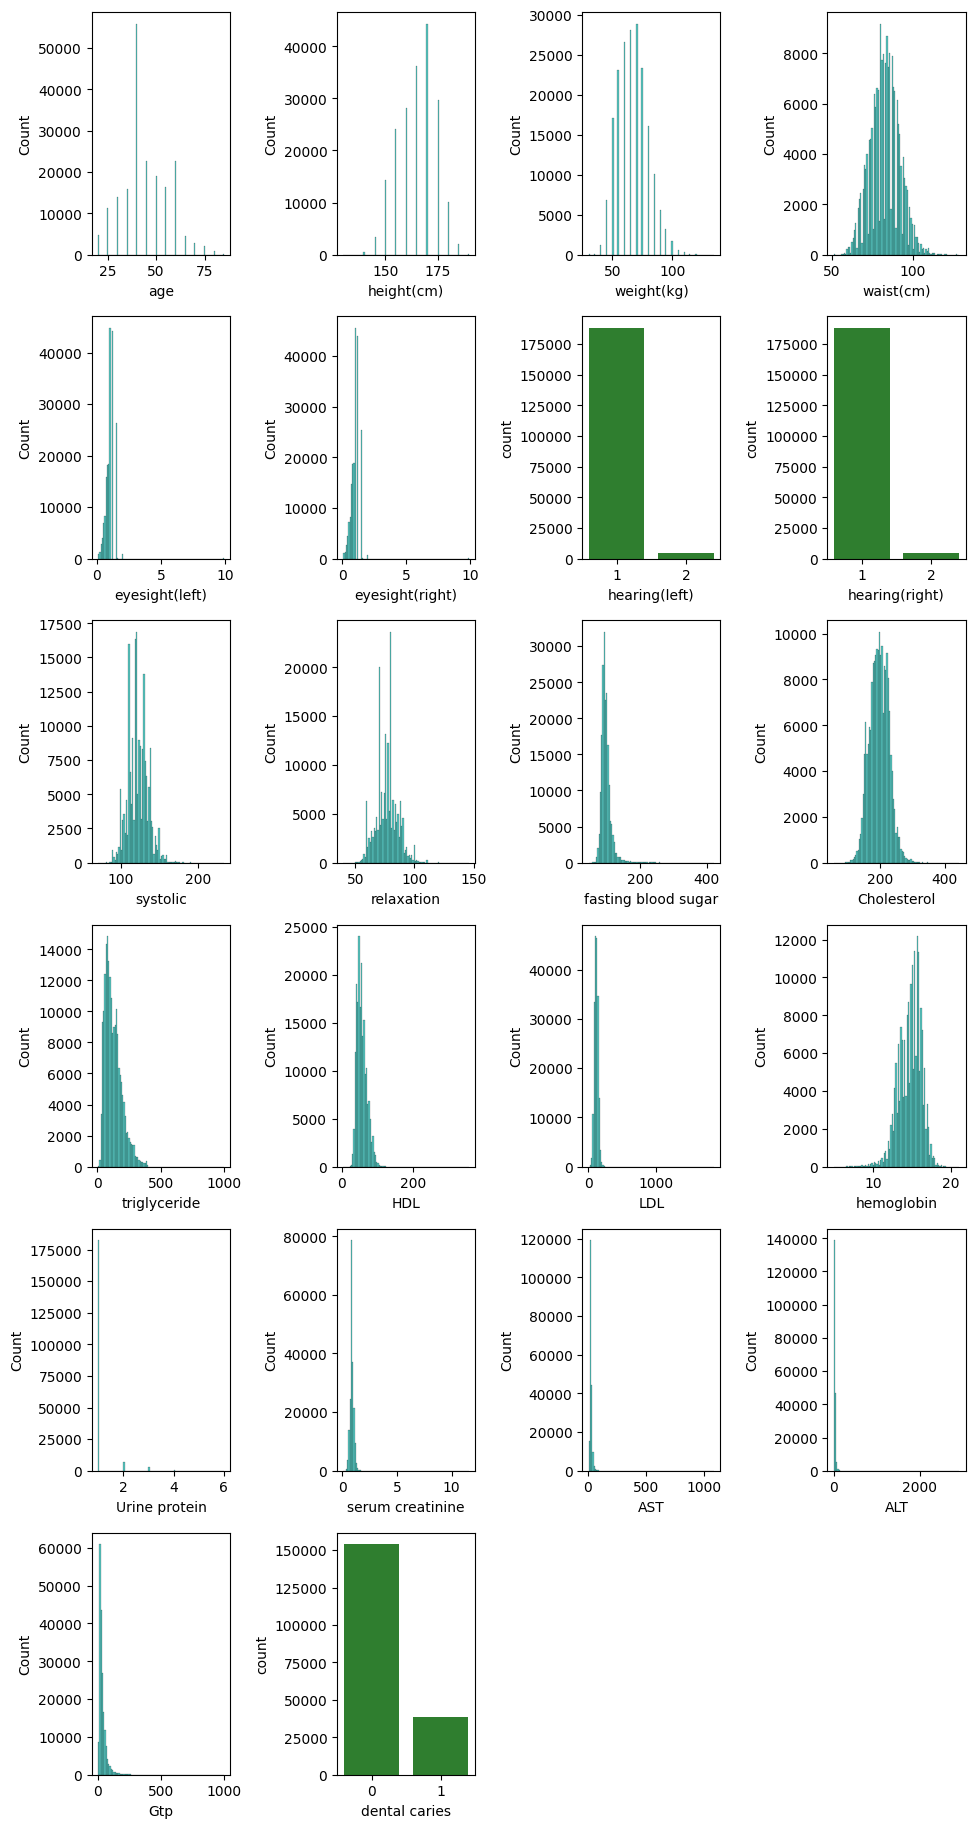

In [11]:
fig, axes = plt.subplots(nrows=n_rows, ncols=n_cols, figsize=(10, 3 * n_rows))
# fig, axs = plt.subplots(nrows=6, ncols=4, figsize=(12, 20))

for col, ax in zip(features, axes.ravel()):
    if train_df[col].nunique() != 2:
        sns.histplot(train_df[col], bins=100, ax=ax,color='lightseagreen')
    else:
        sns.countplot(data=train_df, x=col, ax=ax,color='forestgreen')
    ax.set_xlabel(col)
    
for i in range(len(features), n_rows*n_cols):
    fig.delaxes(axes.flatten()[i])
    
plt.tight_layout()
plt.show()


In [12]:
X_train= train_df.drop(['smoking'], axis=1)
y_train= train_df['smoking']

In [13]:
print('X_train shape:',X_train.shape)
print('y_train shape:', y_train.shape)

X_train shape: (192723, 22)
y_train shape: (192723,)


# **Import ML Libraries**

In [14]:
# !pip install xgboost > nul

In [16]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier, GradientBoostingClassifier,VotingClassifier
from xgboost import XGBClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline

from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.metrics import roc_auc_score,confusion_matrix,accuracy_score


# **Classifier models**

In [17]:

xgbc = XGBClassifier(
            n_estimators=100,
            random_state=SEED,        
            tree_method='hist',
            max_depth=5,
            gamma=0.11,
            subsample=1.0,
            n_jobs=-1)
rf = RandomForestClassifier(n_estimators=200, 
                            max_depth=50, random_state=SEED)

sgb = GradientBoostingClassifier(n_estimators=200,
                                 max_depth=10,subsample=.9, random_state=SEED)

gb = GradientBoostingClassifier(n_estimators=200,
                                max_depth=10, random_state=SEED)

knn = make_pipeline(StandardScaler(),
                    KNeighborsClassifier(n_neighbors=5))
lr= make_pipeline(StandardScaler(),
                 LogisticRegression())

abc = AdaBoostClassifier(n_estimators=200,
                         random_state=SEED)
dtc= DecisionTreeClassifier(max_depth=10,
                           random_state=SEED)

In [18]:
classifier_models=[('xgbc',xgbc),
                   ('sgb',sgb),
                   ('rf',rf),
                   ('abc',abc),
                   ('gb',gb),
                   ('knn',knn),
                   ('dtc',dtc),
                   ('lr',lr)]
for name,model in classifier_models:
    roc_score=cross_val_score(model, X_train, y_train, cv=3,scoring='roc_auc',n_jobs=-1)
    print(name,':',roc_score)

xgbc : [0.86451352 0.86759689 0.85452566]
sgb : [0.86335001 0.8655724  0.85448959]
rf : [0.85880211 0.86082642 0.84962515]
abc : [0.85403282 0.85670843 0.84275018]
gb : [0.86317156 0.86503428 0.85350147]
knn : [0.79931478 0.80215052 0.79295292]
dtc : [0.83276642 0.83191531 0.8177012 ]
lr : [0.82836979 0.83324982 0.82292079]


# **Ensemble**

In [19]:
ensemblemodel=VotingClassifier(estimators=classifier_models,
                              weights=[2.3,2.1,2.0,1.75,1.9,0.7,1.3,0.9], #based on the performance 
                               n_jobs=-1,
                               voting='soft',
                              verbose=3)
roc_score= cross_val_score(ensemblemodel, X_train, y_train, cv=3,scoring='roc_auc',n_jobs=-1,verbose=3)
print('ensemblemodel:',roc_score)


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.


[Voting] ..................... (1 of 8) Processing xgbc, total=  11.1s
[Voting] ..................... (1 of 8) Processing xgbc, total=  11.3s
[Voting] ..................... (1 of 8) Processing xgbc, total=  11.3s
[Voting] ...................... (4 of 8) Processing abc, total= 2.7min
[Voting] ...................... (6 of 8) Processing knn, total=   0.2s
[Voting] ...................... (4 of 8) Processing abc, total= 2.7min
[Voting] ...................... (4 of 8) Processing abc, total= 2.7min
[Voting] ...................... (6 of 8) Processing knn, total=   0.2s
[Voting] ...................... (6 of 8) Processing knn, total=   0.2s
[Voting] ...................... (7 of 8) Processing dtc, total=   6.3s
[Voting] ...................... (7 of 8) Processing dtc, total=   6.2s
[Voting] ...................... (7 of 8) Processing dtc, total=   6.4s
[Voting] ....................... (8 of 8) Processing lr, total=   1.2s
[Voting] ....................... (8 of 8) Processing lr, total=   1.3s
[Votin

[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed: 10.1min finished


In [20]:
ensemblemodel.fit(X_train, y_train)
y_train_perd=ensemblemodel.predict(X_train)

[Voting] ..................... (1 of 8) Processing xgbc, total=   5.8s
[Voting] ...................... (4 of 8) Processing abc, total= 1.2min
[Voting] ...................... (6 of 8) Processing knn, total=   0.1s
[Voting] ...................... (7 of 8) Processing dtc, total=   2.8s
[Voting] ....................... (8 of 8) Processing lr, total=   0.5s
[Voting] ....................... (3 of 8) Processing rf, total= 2.6min
[Voting] ...................... (2 of 8) Processing sgb, total= 5.9min
[Voting] ....................... (5 of 8) Processing gb, total= 6.3min


In [21]:
y_train_perd

array([1, 0, 1, ..., 0, 0, 1])

In [22]:
print(accuracy_score(y_train,y_train_perd))

0.9131603389320424


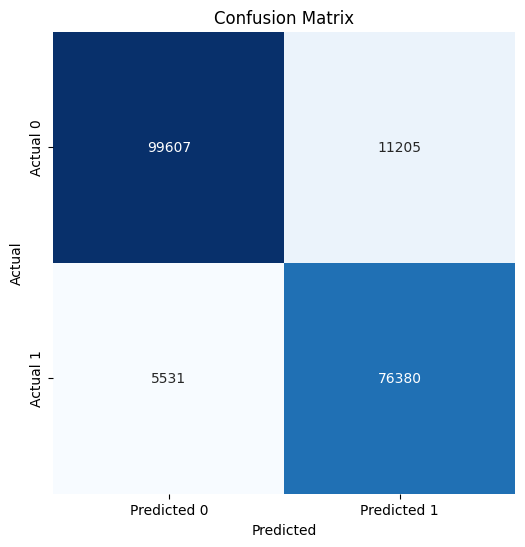

In [23]:

conf_matrix = confusion_matrix(y_train, y_train_perd)


plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', square=True, cbar=False,
            xticklabels=['Predicted 0', 'Predicted 1'], yticklabels=['Actual 0', 'Actual 1'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')

plt.show()

# **Test and sample submision data**

In [24]:
test_df=pd.read_csv('/kaggle/input/playground-series-s3e24/test.csv')
test_df.head()

,id,age,height(cm),weight(kg),waist(cm),eyesight(left),eyesight(right),hearing(left),hearing(right),systolic,...,triglyceride,HDL,LDL,hemoglobin,Urine protein,serum creatinine,AST,ALT,Gtp,dental caries
0,159256,40,165,70,84.0,1.2,1.2,1,1,130,...,186,49,115,14.2,1,0.9,19,25,32,0
1,159257,80,160,60,93.0,1.0,1.0,2,2,144,...,158,35,104,13.0,1,1.1,20,12,24,0
2,159258,60,170,70,86.5,0.6,0.7,1,1,117,...,173,39,88,15.4,1,1.4,38,60,36,0
3,159259,40,160,50,67.0,0.3,0.4,1,1,116,...,47,75,128,14.5,1,0.6,25,18,10,1
4,159260,40,170,75,89.4,1.0,0.9,1,1,132,...,100,39,123,16.5,1,1.0,30,39,27,1


In [25]:
sample_df=pd.read_csv('/kaggle/input/playground-series-s3e24/sample_submission.csv')
sample_df.head()

,id,smoking
0,159256,0.5
1,159257,0.5
2,159258,0.5
3,159259,0.5
4,159260,0.5


# Prediction and Submit

In [26]:
id=test_df.id
X_test=test_df.drop(['id'],axis=1)
pred=ensemblemodel.predict_proba(X_test)[:,1]
print(pred)

[0.58494574 0.28257138 0.48259912 ... 0.50667596 0.15043285 0.09641902]


In [27]:
submit=pd.DataFrame({'id':id, 'smoking':pred})
submit.head()


,id,smoking
0,159256,0.584946
1,159257,0.282571
2,159258,0.482599
3,159259,0.097756
4,159260,0.597351


In [28]:
submit.to_csv('submit.csv',index=False,sep=',')

#### **The reuslted submit.csv file is submitted to the Competetion: [https://www.kaggle.com/competitions/playground-series-s3e24/](http://)**